In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv(r'C:\Users\Loki\Downloads\Data_work\updated_ski_data.csv',index_col=None)

In [3]:
data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [4]:
data.shape

(330, 27)

In [5]:
data.describe()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
count,330.000000,330.000000,330.000000,330.000000,164.000000,330.000000,330.000000,330.000000,330.00000,330.000000,...,325.000000,327.000000,284.000000,279.000000,329.000000,316.000000,276.000000,279.000000,283.000000,187.000000
mean,4591.818182,1215.427273,3374.000000,0.172727,0.006098,0.184848,1.018182,0.933333,1.50000,1.833333,...,1.433231,739.801223,174.873239,115.103943,63.656535,185.316456,57.916957,64.166810,120.053004,100.395722
std,3735.535934,947.864557,3117.121621,0.559946,0.078087,0.651685,2.198294,1.312245,1.61913,1.815028,...,1.156171,1816.167441,261.336125,35.063251,109.429928,136.356842,26.140126,24.554584,31.045963,105.169620
min,315.000000,60.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,8.000000,2.000000,3.000000,6.000000,18.000000,15.000000,17.000000,30.000000,2.000000
25%,1403.750000,461.250000,869.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,...,0.500000,85.000000,50.000000,97.000000,50.000000,69.000000,40.000000,47.000000,100.000000,40.000000
50%,3127.500000,964.500000,1561.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,...,1.000000,200.000000,100.000000,114.000000,58.000000,150.000000,50.000000,60.000000,120.000000,72.000000
75%,7806.000000,1800.000000,6325.250000,0.000000,0.000000,0.000000,1.000000,1.000000,2.00000,3.000000,...,2.000000,690.000000,200.500000,135.000000,69.000000,300.000000,71.000000,77.500000,139.500000,114.000000
max,13487.000000,4425.000000,10800.000000,4.000000,1.000000,6.000000,15.000000,8.000000,8.00000,14.000000,...,6.000000,26819.000000,3379.000000,305.000000,2019.000000,669.000000,179.000000,179.000000,305.000000,650.000000


In [6]:
data.columns

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

In [7]:
data.values

array([['Alyeska Resort', 'Alaska', 'Alaska', ..., 85.0, 150.0, 550.0],
       ['Eaglecrest Ski Area', 'Alaska', 'Alaska', ..., 53.0, 90.0, nan],
       ['Hilltop Ski Area', 'Alaska', 'Alaska', ..., 34.0, 152.0, 30.0],
       ...,
       ['Snow King Resort', 'Wyoming', 'Wyoming', ..., 59.0, 123.0,
        110.0],
       ['Snowy Range Ski & Recreation Area', 'Wyoming', 'Wyoming', ...,
        49.0, nan, nan],
       ['White Pine Ski Area', 'Wyoming', 'Wyoming', ..., 49.0, nan, nan]],
      dtype=object)

In [8]:
data.index

RangeIndex(start=0, stop=330, step=1)

In [9]:
data.isnull().any()

Name                 False
Region               False
state                False
summit_elev          False
vertical_drop        False
base_elev            False
trams                False
fastEight             True
fastSixes            False
fastQuads            False
quad                 False
triple               False
double               False
surface              False
total_chairs         False
Runs                  True
TerrainParks          True
LongestRun_mi         True
SkiableTerrain_ac     True
Snow Making_ac        True
daysOpenLastYear      True
yearsOpen             True
averageSnowfall       True
AdultWeekday          True
AdultWeekend          True
projectedDaysOpen     True
NightSkiing_ac        True
dtype: bool

In [10]:
data['fastEight'].unique()

array([ 0., nan,  1.])

In [11]:
data['fastEight']=data['total_chairs']-(data['fastSixes']+data['fastQuads']+data['quad']+data['triple']+data['double']+data['surface'])

In [12]:
data['fastEight']

0      1
1      0
2      0
3      0
4      0
      ..
325    0
326    0
327    0
328    0
329    0
Name: fastEight, Length: 330, dtype: int64

In [13]:
data['Equals']=data['fastEight']+data['fastSixes']+data['fastQuads']+data['quad']+data['triple']+data['double']+data['surface']

In [14]:
print(data['Equals'].equals(data['total_chairs']))

True


In [15]:
data.isnull().any()

Name                 False
Region               False
state                False
summit_elev          False
vertical_drop        False
base_elev            False
trams                False
fastEight            False
fastSixes            False
fastQuads            False
quad                 False
triple               False
double               False
surface              False
total_chairs         False
Runs                  True
TerrainParks          True
LongestRun_mi         True
SkiableTerrain_ac     True
Snow Making_ac        True
daysOpenLastYear      True
yearsOpen             True
averageSnowfall       True
AdultWeekday          True
AdultWeekend          True
projectedDaysOpen     True
NightSkiing_ac        True
Equals               False
dtype: bool

In [16]:
data.dtypes

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight              int64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
Equals                 int64
dtype: object

In [17]:
data.loc[:,'Runs':'NightSkiing_ac']

,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...
325,14.0,1.0,1.5,300.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN
326,48.0,1.0,1.0,184.0,18.0,61.0,81.0,310.0,42.0,42.0,77.0,NaN
327,32.0,2.0,1.0,400.0,250.0,121.0,80.0,300.0,59.0,59.0,123.0,110.0
328,33.0,2.0,0.7,75.0,30.0,131.0,59.0,250.0,49.0,49.0,NaN,NaN


In [18]:
data['Runs'].isnull().value_counts()

False    326
True       4
Name: Runs, dtype: int64

In [19]:
dat=data['LongestRun_mi']

In [20]:
missing=((dat>0)&(dat<3.0))

In [21]:
r=data[['Runs','LongestRun_mi']]

In [22]:
r[r['Runs'].isnull()]


,Runs,LongestRun_mi
39,NaN,1.5
108,NaN,2.3
218,NaN,1.0
296,NaN,0.8


In [23]:
data['Runs']=data['Runs'].fillna(0)

In [24]:
data[data['Runs'].isnull()]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Equals


In [25]:
data[data['Runs']==0]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Equals
39,Silverton Mountain,Colorado,Colorado,13487,3087,10400,0,0,0,0,...,26819.0,NaN,175.0,17.0,400.0,79.0,79.0,181.0,NaN,1
108,Mount Bohemia,Michigan,Michigan,1500,900,600,0,0,0,0,...,585.0,NaN,83.0,19.0,273.0,68.0,68.0,100.0,NaN,2
218,Sapphire Valley,North Carolina,North Carolina,3450,200,3200,0,0,0,0,...,8.0,8.0,53.0,55.0,24.0,40.0,43.0,60.0,8.0,3
296,Mission Ridge,Washington,Washington,6820,2250,4570,0,0,0,1,...,2000.0,66.0,104.0,53.0,200.0,NaN,NaN,96.0,500.0,6


In [26]:
Runs=data['Runs']

In [27]:
t=Runs[missing].mean()

In [28]:
data['Runs']=data['Runs'].replace(0,t)

In [29]:
data[data['Runs']==0]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Equals


In [30]:
data.isnull().any()

Name                 False
Region               False
state                False
summit_elev          False
vertical_drop        False
base_elev            False
trams                False
fastEight            False
fastSixes            False
fastQuads            False
quad                 False
triple               False
double               False
surface              False
total_chairs         False
Runs                 False
TerrainParks          True
LongestRun_mi         True
SkiableTerrain_ac     True
Snow Making_ac        True
daysOpenLastYear      True
yearsOpen             True
averageSnowfall       True
AdultWeekday          True
AdultWeekend          True
projectedDaysOpen     True
NightSkiing_ac        True
Equals               False
dtype: bool

In [31]:
data['TerrainParks'].isnull().value_counts()

False    279
True      51
Name: TerrainParks, dtype: int64

In [32]:
data['TerrainParks'].unique()

array([ 2.,  1.,  4., 14.,  6.,  5.,  3.,  7., nan,  9., 10.,  8.])

In [33]:
data['TerrainParks']=data['TerrainParks'].ffill(axis=0)

In [34]:
data.isnull().any()

Name                 False
Region               False
state                False
summit_elev          False
vertical_drop        False
base_elev            False
trams                False
fastEight            False
fastSixes            False
fastQuads            False
quad                 False
triple               False
double               False
surface              False
total_chairs         False
Runs                 False
TerrainParks         False
LongestRun_mi         True
SkiableTerrain_ac     True
Snow Making_ac        True
daysOpenLastYear      True
yearsOpen             True
averageSnowfall       True
AdultWeekday          True
AdultWeekend          True
projectedDaysOpen     True
NightSkiing_ac        True
Equals               False
dtype: bool

In [35]:
data['LongestRun_mi'].isnull().value_counts()

False    325
True       5
Name: LongestRun_mi, dtype: int64

In [36]:
data['LongestRun_mi'].mean()

1.4332307692307693

In [37]:
data['LongestRun_mi']=data['LongestRun_mi'].fillna(method='bfill')

In [38]:
data.isnull().any()

Name                 False
Region               False
state                False
summit_elev          False
vertical_drop        False
base_elev            False
trams                False
fastEight            False
fastSixes            False
fastQuads            False
quad                 False
triple               False
double               False
surface              False
total_chairs         False
Runs                 False
TerrainParks         False
LongestRun_mi        False
SkiableTerrain_ac     True
Snow Making_ac        True
daysOpenLastYear      True
yearsOpen             True
averageSnowfall       True
AdultWeekday          True
AdultWeekend          True
projectedDaysOpen     True
NightSkiing_ac        True
Equals               False
dtype: bool

In [39]:
t=data['SkiableTerrain_ac'].mean()
t

739.8012232415903

In [40]:
data['SkiableTerrain_ac']=data['SkiableTerrain_ac'].fillna(0)

In [41]:
data['SkiableTerrain_ac']=data['SkiableTerrain_ac'].replace(0,t)

In [42]:
data['Snow Making_ac']=data['Snow Making_ac'].fillna(method='ffill')

In [43]:
data['Snow Making_ac'].isnull().value_counts()

False    330
Name: Snow Making_ac, dtype: int64

In [44]:
data['daysOpenLastYear']=data['daysOpenLastYear'].fillna(data['daysOpenLastYear'].mean())

In [45]:
data['daysOpenLastYear'].isnull().value_counts()

False    330
Name: daysOpenLastYear, dtype: int64

In [46]:
data['yearsOpen'].isnull().value_counts()

False    329
True       1
Name: yearsOpen, dtype: int64

In [47]:
data['yearsOpen']=data['yearsOpen'].fillna(method='ffill')

In [48]:
data['yearsOpen'].isnull().value_counts()

False    330
Name: yearsOpen, dtype: int64

In [49]:
data.averageSnowfall.isnull().value_counts()

False    316
True      14
Name: averageSnowfall, dtype: int64

In [50]:
data['averageSnowfall']=data['averageSnowfall'].fillna(method='ffill')

In [51]:
data['AdultWeekday']=data['AdultWeekday'].fillna(method='ffill')

In [52]:
data['AdultWeekend']=data['AdultWeekend'].fillna(data['AdultWeekend'].mean())

In [53]:
data['projectedDaysOpen']=data['projectedDaysOpen'].fillna(data.projectedDaysOpen.mean())

In [54]:
data['NightSkiing_ac'].isnull().value_counts()

False    187
True     143
Name: NightSkiing_ac, dtype: int64

In [55]:
data['NightSkiing_ac']=data['NightSkiing_ac'].fillna(data['NightSkiing_ac'].mean())

In [56]:
data.drop(columns='Equals')

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,1,0,2,...,1.0,1610.0,113.0,150.000000,60.0,669.0,65.0,85.00000,150.000000,550.000000
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,2.0,640.0,60.0,45.000000,44.0,350.0,47.0,53.00000,90.000000,100.395722
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,30.0,30.0,150.000000,36.0,69.0,30.0,34.00000,152.000000,30.000000
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0,1,0,...,2.0,777.0,104.0,122.000000,81.0,260.0,89.0,89.00000,122.000000,100.395722
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,0,1,...,1.2,800.0,80.0,115.000000,49.0,250.0,74.0,78.00000,104.000000,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming,9500,1000,8500,0,0,0,0,...,1.5,300.0,195.0,115.103943,9.0,459.0,48.0,64.16681,120.053004,100.395722
326,Sleeping Giant Ski Resort,Wyoming,Wyoming,7428,810,6619,0,0,0,0,...,1.0,184.0,18.0,61.000000,81.0,310.0,42.0,42.00000,77.000000,100.395722
327,Snow King Resort,Wyoming,Wyoming,7808,1571,6237,0,0,0,0,...,1.0,400.0,250.0,121.000000,80.0,300.0,59.0,59.00000,123.000000,110.000000
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming,9663,990,8798,0,0,0,0,...,0.7,75.0,30.0,131.000000,59.0,250.0,49.0,49.00000,120.053004,100.395722


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002694F71C248>,
      dtype=object)

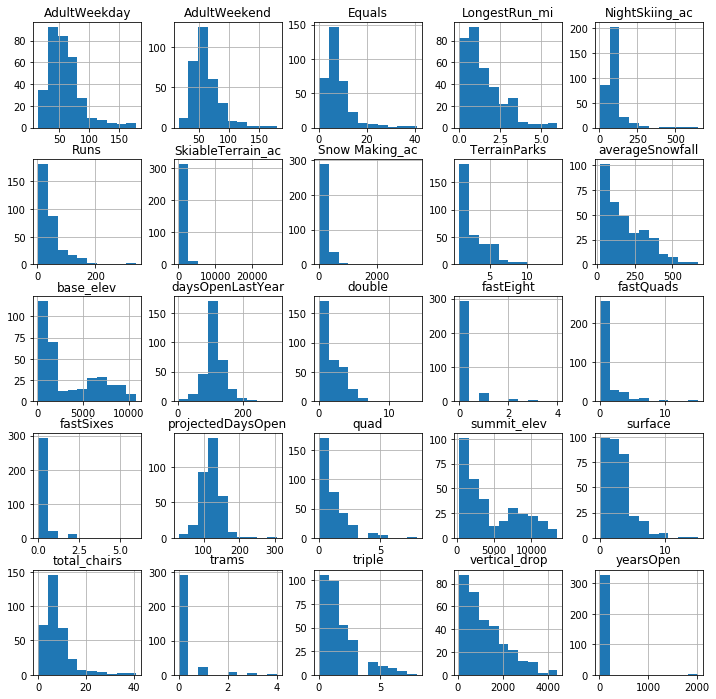

In [57]:
data.hist(figsize=(12,12))

In [58]:
data.describe()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Equals
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.00000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,4591.818182,1215.427273,3374.000000,0.172727,0.175758,0.184848,1.018182,0.933333,1.50000,1.833333,...,739.801223,184.427273,115.103943,63.712121,183.293939,59.615394,64.166810,120.053004,100.395722,8.266667
std,3735.535934,947.864557,3117.121621,0.559946,0.567097,0.651685,2.198294,1.312245,1.61913,1.815028,...,1807.868079,306.968295,32.231212,109.268160,135.659825,28.259757,22.571324,28.742976,79.076753,5.798683
min,315.000000,60.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,8.000000,2.000000,3.000000,6.000000,18.000000,15.000000,17.000000,30.000000,2.000000,0.000000
25%,1403.750000,461.250000,869.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,...,85.000000,50.000000,100.000000,50.000000,69.000000,41.250000,49.000000,101.250000,60.000000,5.000000
50%,3127.500000,964.500000,1561.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,...,200.000000,103.500000,115.103943,58.000000,150.000000,52.000000,64.166810,120.053004,100.395722,7.000000
75%,7806.000000,1800.000000,6325.250000,0.000000,0.000000,0.000000,1.000000,1.000000,2.00000,3.000000,...,739.801223,201.500000,130.000000,69.000000,295.000000,74.000000,72.000000,136.000000,100.395722,10.000000
max,13487.000000,4425.000000,10800.000000,4.000000,4.000000,6.000000,15.000000,8.000000,8.00000,14.000000,...,26819.000000,3379.000000,305.000000,2019.000000,669.000000,179.000000,179.000000,305.000000,650.000000,41.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269501B2E48>,
      dtype=object)

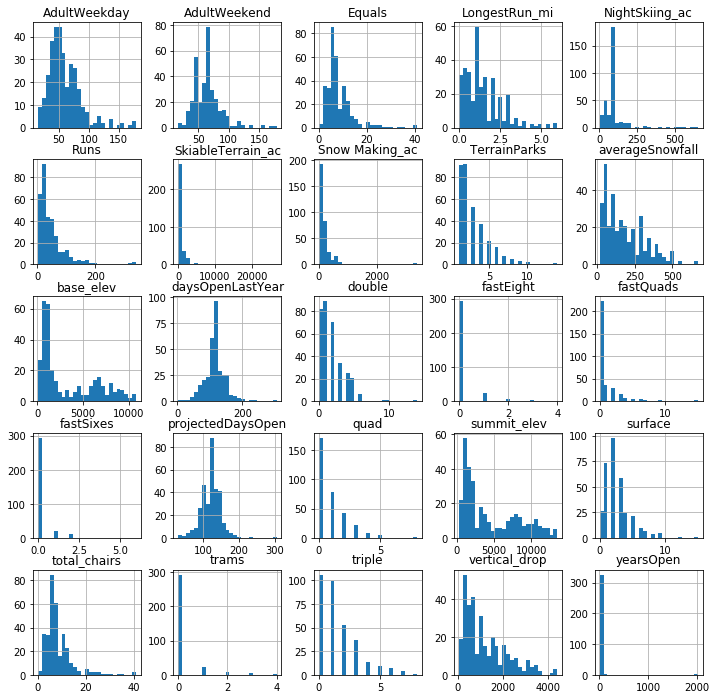

In [59]:
data.hist(bins=25,figsize=(12,12))

In [60]:
import seaborn as sns

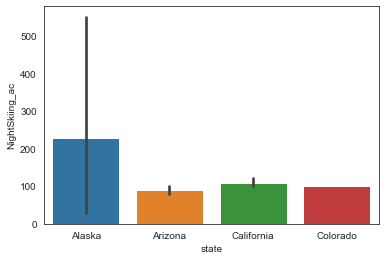

In [104]:
d=data['state'].head(30)
t=data['NightSkiing_ac'].head(30)
x=sns.barplot(x=d,y=t,data=data)


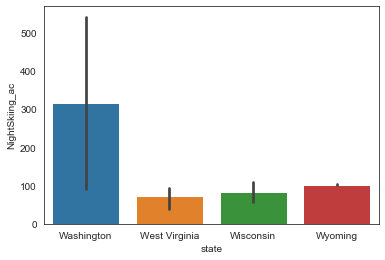

In [105]:
e=data['state'].tail(30)
f=data['NightSkiing_ac'].tail(45)
yt=sns.barplot(x=e,y=f,data=data)

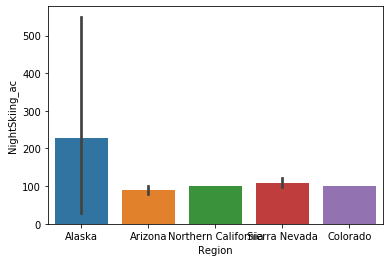

In [63]:
r=data['Region'].head(30)
o=data['NightSkiing_ac'].head(30)
p=sns.barplot(x=r,y=o,data=data)

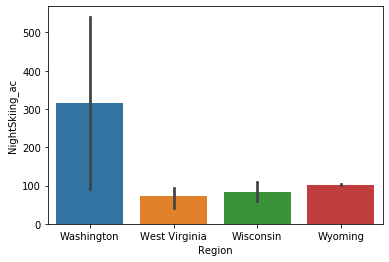

In [64]:
w=data['Region'].tail(30)
s=data['NightSkiing_ac'].tail(30)
e=sns.barplot(x=w,y=s,data=data)

In [65]:
data=data.drop(columns='Region')


In [66]:
data=data.drop(columns='Equals')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 26 columns):
Name                 330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null int64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null float64
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       330 non-null float64
daysOpenLastYear     330 non-null float64
yearsOpen            330 non-null float64
averageSnowfall      330 non-null float

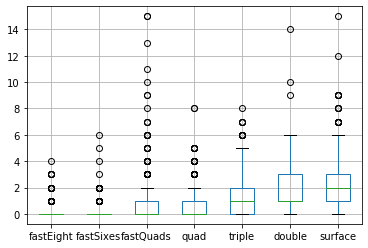

In [68]:
t=data.boxplot(column=['fastEight','fastSixes','fastQuads','quad','triple','double','surface'])

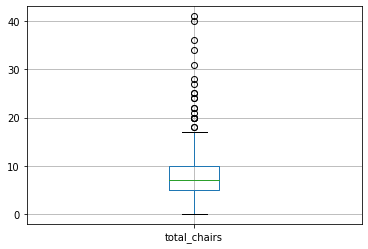

In [69]:
data.boxplot(column='total_chairs')

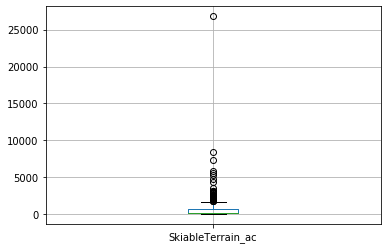

In [70]:
data.boxplot(column=['SkiableTerrain_ac'])

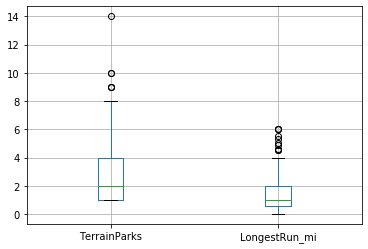

In [71]:
data.boxplot(column=['TerrainParks','LongestRun_mi'])

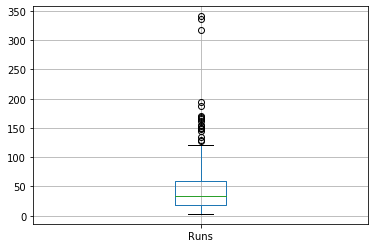

In [72]:
data.boxplot(column=['Runs'])

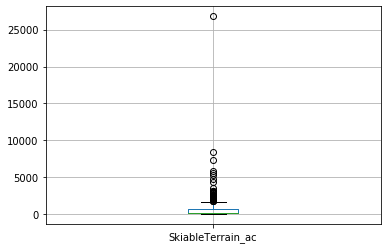

In [73]:
data.boxplot(column=['SkiableTerrain_ac'])

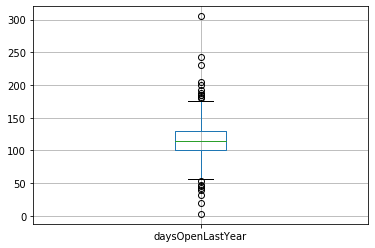

In [74]:
data.boxplot(column=['daysOpenLastYear'])

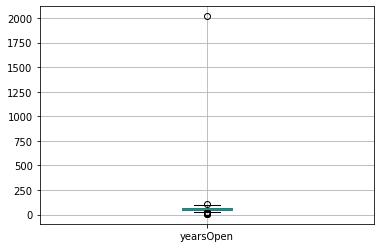

In [75]:
data.boxplot(column=['yearsOpen'])

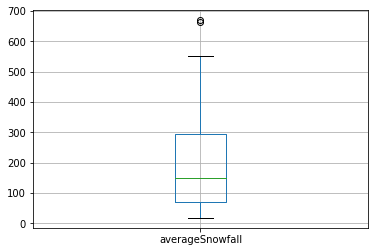

In [76]:
data.boxplot(column=['averageSnowfall'])

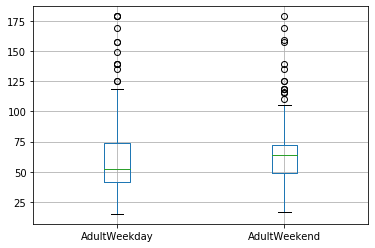

In [77]:
data.boxplot(column=['AdultWeekday','AdultWeekend'])

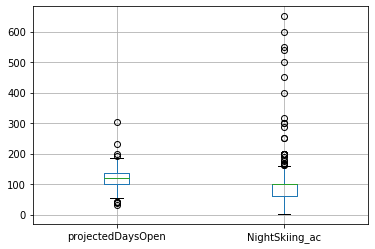

In [78]:
data.boxplot(column=['projectedDaysOpen','NightSkiing_ac'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026952E87CC8>,
      dtype=object)

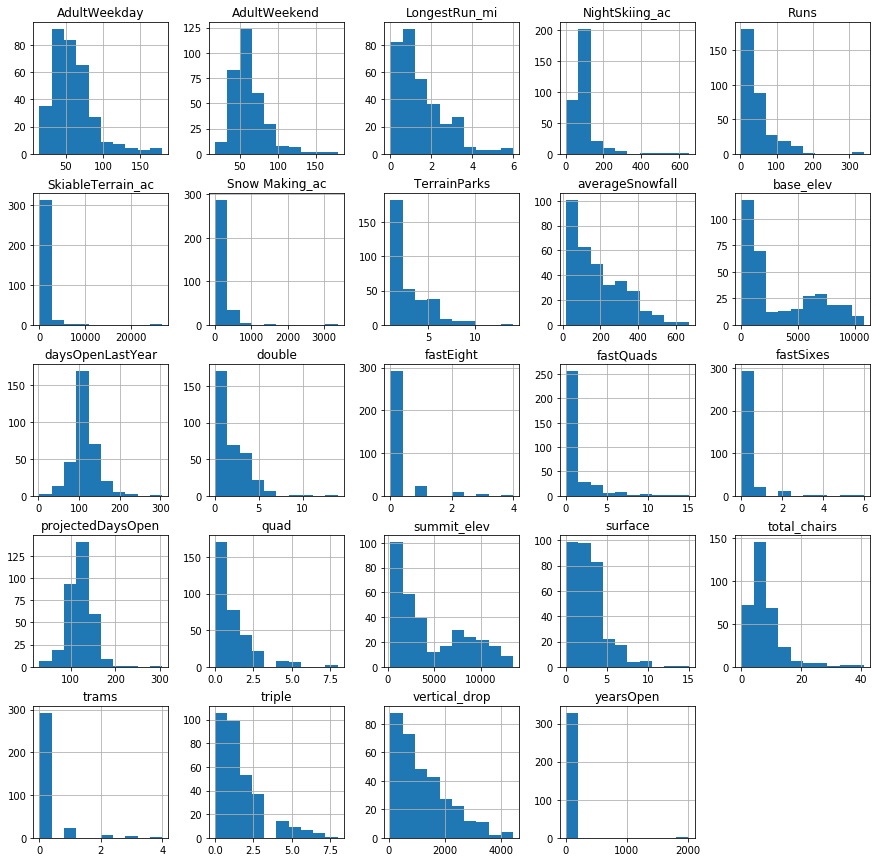

In [79]:
data.hist(figsize=(15,15))

In [80]:
data.isnull().any()

Name                 False
state                False
summit_elev          False
vertical_drop        False
base_elev            False
trams                False
fastEight            False
fastSixes            False
fastQuads            False
quad                 False
triple               False
double               False
surface              False
total_chairs         False
Runs                 False
TerrainParks         False
LongestRun_mi        False
SkiableTerrain_ac    False
Snow Making_ac       False
daysOpenLastYear     False
yearsOpen            False
averageSnowfall      False
AdultWeekday         False
AdultWeekend         False
projectedDaysOpen    False
NightSkiing_ac       False
dtype: bool

In [81]:
data.isnull().any()

Name                 False
state                False
summit_elev          False
vertical_drop        False
base_elev            False
trams                False
fastEight            False
fastSixes            False
fastQuads            False
quad                 False
triple               False
double               False
surface              False
total_chairs         False
Runs                 False
TerrainParks         False
LongestRun_mi        False
SkiableTerrain_ac    False
Snow Making_ac       False
daysOpenLastYear     False
yearsOpen            False
averageSnowfall      False
AdultWeekday         False
AdultWeekend         False
projectedDaysOpen    False
NightSkiing_ac       False
dtype: bool

In [82]:
x=data['Runs']

data['Runs']=x[x.between(x.quantile(.15), x.quantile(.85))]

In [83]:
s=data.SkiableTerrain_ac
data.SkiableTerrain_ac=s[s.between(s.quantile(.15),x.quantile(.85))]

In [84]:
y=data.yearsOpen
data.yearsOpen=y[y.between(y.quantile(.15),y.quantile(.85))]

In [85]:
t=data.TerrainParks
data.TerrainParks=t[t.between(t.quantile(.15),t.quantile(.85))]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026951430D48>,
      dtype=object)

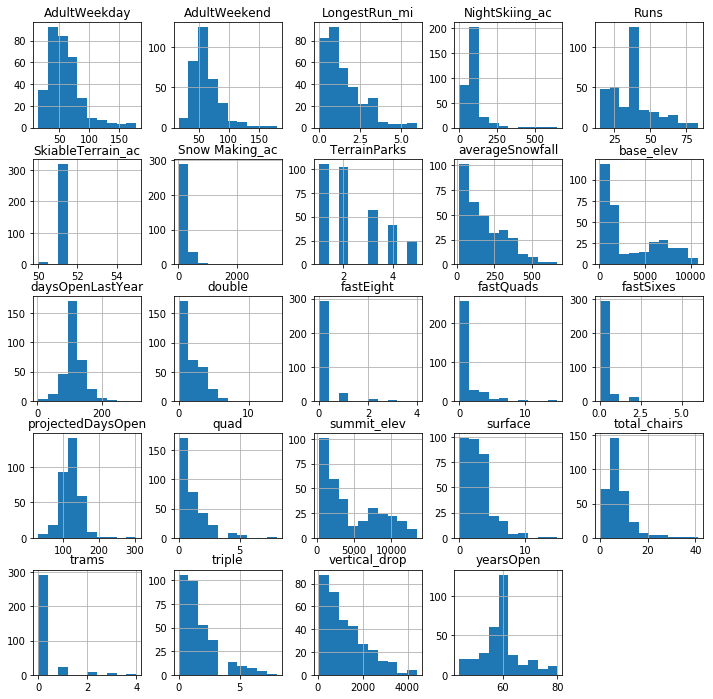

In [86]:
data.TerrainParks=data.TerrainParks.fillna(method='ffill')
data.Runs=data.Runs.fillna(data.Runs.mean())
data.SkiableTerrain_ac=data.SkiableTerrain_ac.fillna(data.SkiableTerrain_ac.mean())
data.yearsOpen=data.yearsOpen.fillna(data.yearsOpen.mean())



data.hist(figsize=(12,12))


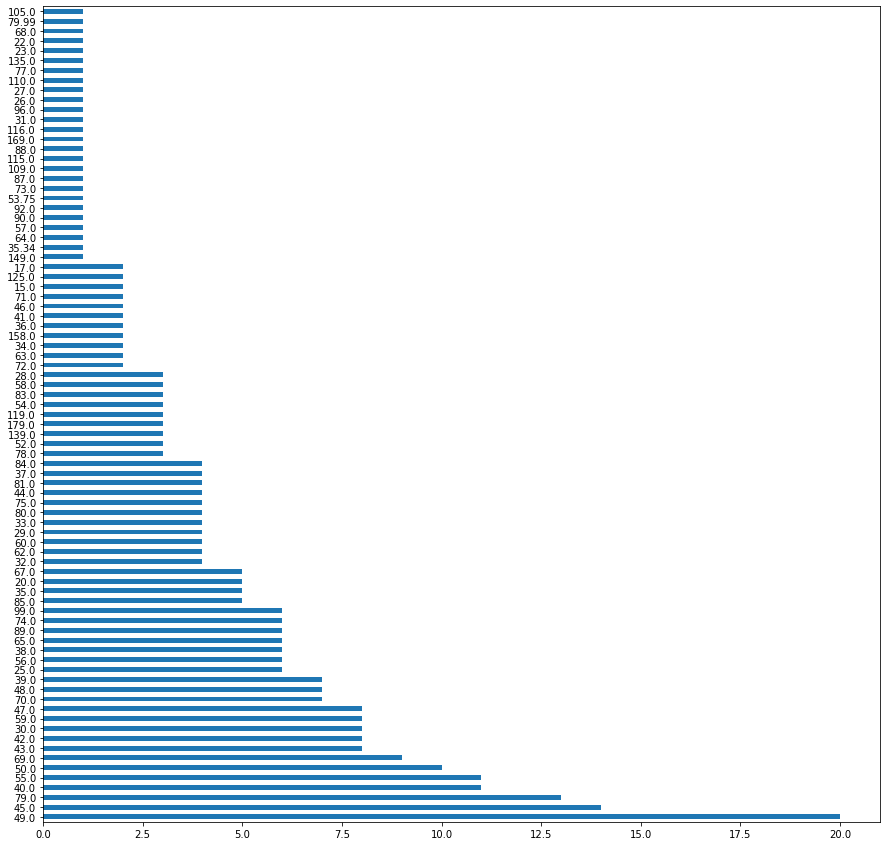

In [87]:
data['AdultWeekday'].value_counts().plot(kind='barh',figsize=(15,15))

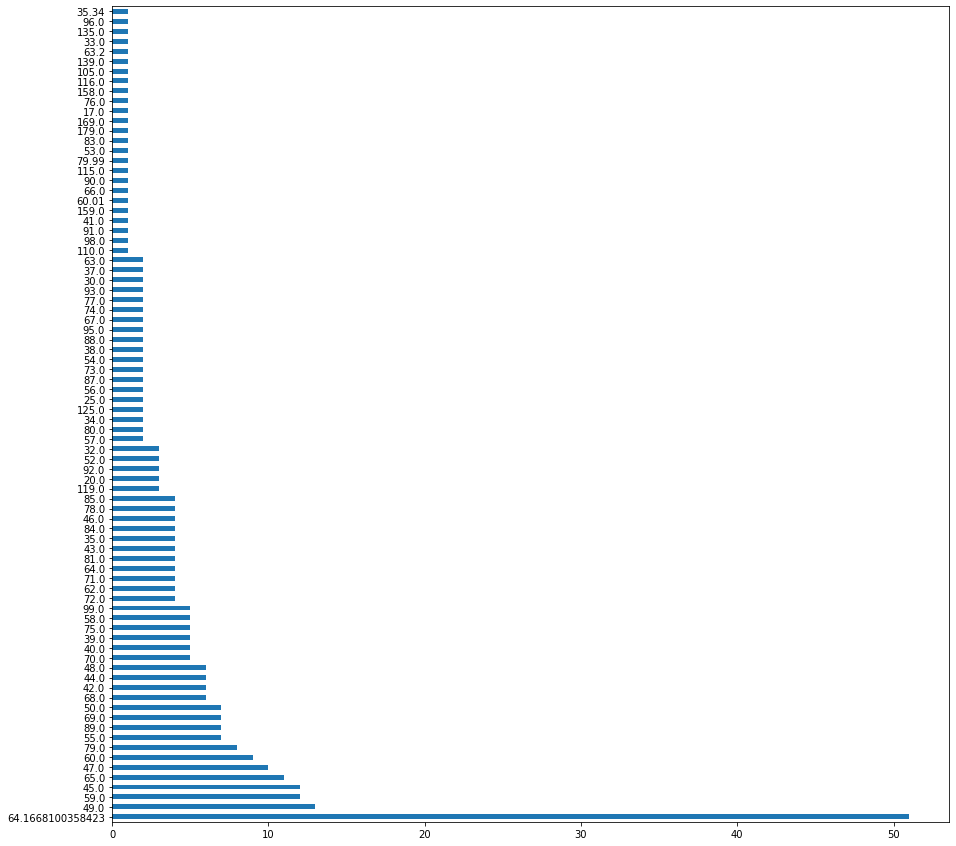

In [88]:
data['AdultWeekend'].value_counts().plot(kind='barh',figsize=(15,15))

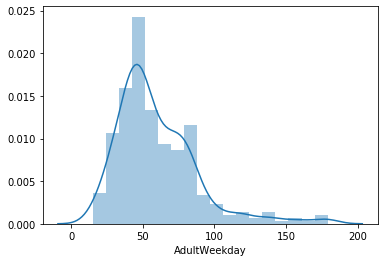

In [89]:
adult=sns.distplot(data['AdultWeekday'])

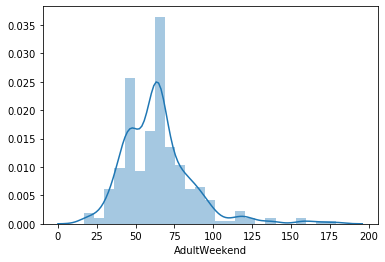

In [90]:
weekend=sns.distplot(data['AdultWeekend'])

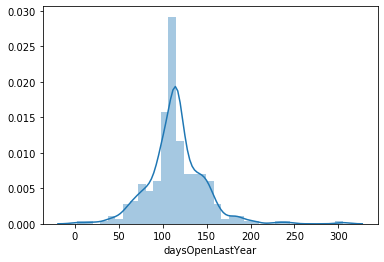

In [91]:
year_open=sns.distplot(data['daysOpenLastYear'])

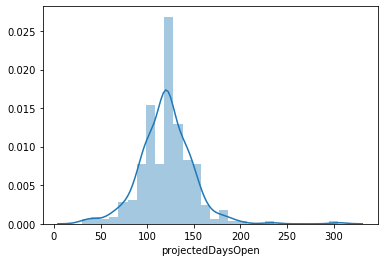

In [92]:
projected=sns.distplot(data.projectedDaysOpen)

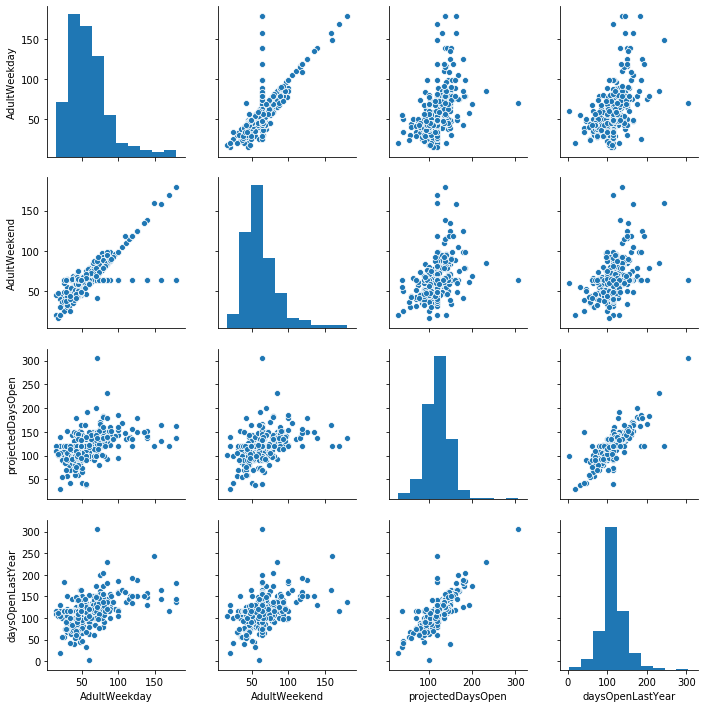

In [93]:
sns.pairplot(data=data,vars=['AdultWeekday','AdultWeekend','projectedDaysOpen','daysOpenLastYear'])

In [94]:
mask=np.zeros_like(data.corr())
trianle_indices=np.triu_indices_from(mask)
mask[trianle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 

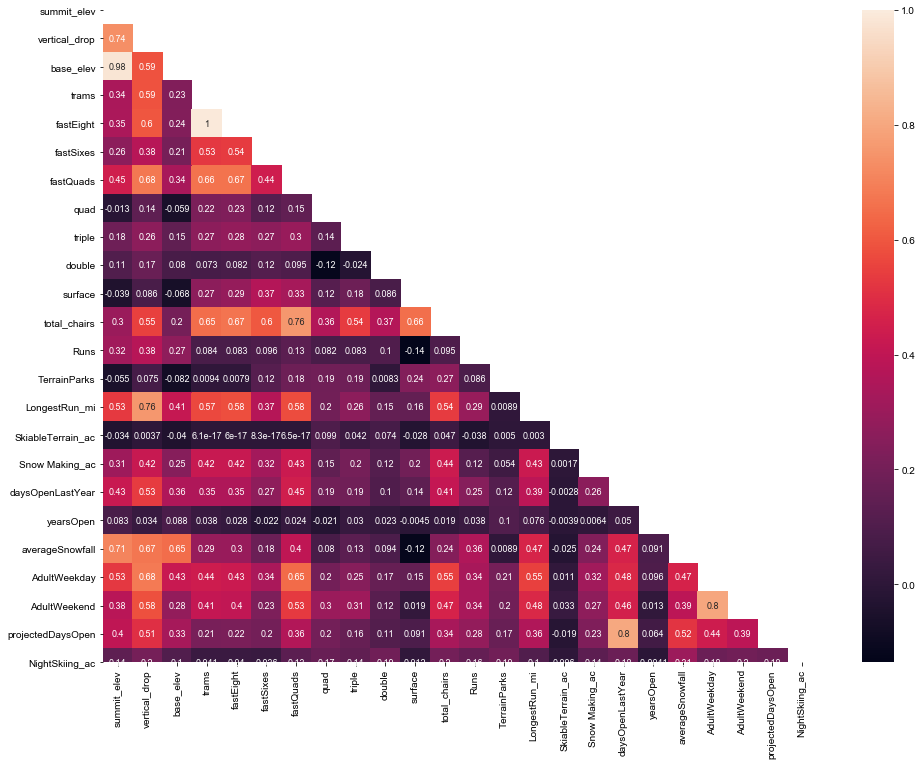

In [95]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={'size':9})
sns.set_style('white')
plt.show()

In [96]:
from sklearn.cluster import KMeans
x = data.drop(['Name','state'], axis =1).values

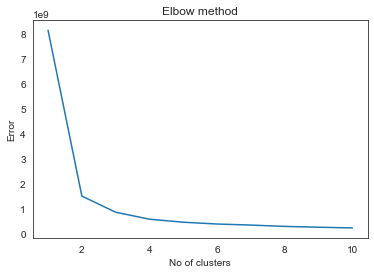

In [97]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
#import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [111]:
f=pd.DataFrame(data)

In [112]:
csv=f.to_csv('step_output.csv')

In [123]:
df=pd.read_csv('step_output.csv',index_col='Name')

In [124]:
df.head()

,Unnamed: 0,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
Name,,,,,,,,,,,,,,,,,,,,,
Alyeska Resort,0,Alaska,3939,2500,250,1,1,0,2,2,...,1.0,51.384615,113.0,150.0,60.000000,669.0,65.0,85.0,150.0,550.000000
Eaglecrest Ski Area,1,Alaska,2600,1540,1200,0,0,0,0,0,...,2.0,51.384615,60.0,45.0,44.000000,350.0,47.0,53.0,90.0,100.395722
Hilltop Ski Area,2,Alaska,2090,294,1796,0,0,0,0,0,...,1.0,51.384615,30.0,150.0,59.119149,69.0,30.0,34.0,152.0,30.000000
Arizona Snowbowl,3,Arizona,11500,2300,9200,0,0,1,0,2,...,2.0,51.384615,104.0,122.0,59.119149,260.0,89.0,89.0,122.0,100.395722
Sunrise Park Resort,4,Arizona,11100,1800,9200,0,0,0,1,2,...,1.2,51.384615,80.0,115.0,49.000000,250.0,74.0,78.0,104.0,80.000000


In [135]:
df=df.drop(columns='Unnamed: 0')

In [136]:
df.head()

,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
Name,,,,,,,,,,,,,,,,,,,,,
Alyeska Resort,Alaska,3939,2500,250,1,1,0,2,2,0,...,1.0,51.384615,113.0,150.0,60.000000,669.0,65.0,85.0,150.0,550.000000
Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0,0,0,0,0,...,2.0,51.384615,60.0,45.0,44.000000,350.0,47.0,53.0,90.0,100.395722
Hilltop Ski Area,Alaska,2090,294,1796,0,0,0,0,0,1,...,1.0,51.384615,30.0,150.0,59.119149,69.0,30.0,34.0,152.0,30.000000
Arizona Snowbowl,Arizona,11500,2300,9200,0,0,1,0,2,2,...,2.0,51.384615,104.0,122.0,59.119149,260.0,89.0,89.0,122.0,100.395722
Sunrise Park Resort,Arizona,11100,1800,9200,0,0,0,1,2,3,...,1.2,51.384615,80.0,115.0,49.000000,250.0,74.0,78.0,104.0,80.000000


In [138]:
df=df.reset_index()

In [139]:
df.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,1,0,2,2,...,1.0,51.384615,113.0,150.0,60.000000,669.0,65.0,85.0,150.0,550.000000
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0,0,0,0,...,2.0,51.384615,60.0,45.0,44.000000,350.0,47.0,53.0,90.0,100.395722
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0,0,0,0,...,1.0,51.384615,30.0,150.0,59.119149,69.0,30.0,34.0,152.0,30.000000
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0,1,0,2,...,2.0,51.384615,104.0,122.0,59.119149,260.0,89.0,89.0,122.0,100.395722
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0,0,1,2,...,1.2,51.384615,80.0,115.0,49.000000,250.0,74.0,78.0,104.0,80.000000


In [142]:
df1=pd.get_dummies(df,columns=['state'])

In [143]:
df1.head()

,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,Alyeska Resort,3939,2500,250,1,1,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,1200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,1796,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,9200,0,0,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,9200,0,0,0,1,2,3,...,0,0,0,0,0,0,0,0,0,0


In [145]:
X_train,X_test,y_train,y_test=train_test_split(df1,df1['AdultWeekend'],test_size=0.25,random_state=0)